In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

from model import RatingModel, AnimeStandardScaler
from recommendation_system import RecommendationSystem

import pathlib
import pandas as pd

from dataset import Dataset, score

In [2]:
x = RecommendationSystem.load('test_save.pkl')

In [9]:
x

In [4]:
HOME_DIR = pathlib.Path().home()
DATA_DIR = HOME_DIR / 'data/other/archive'

In [5]:
# anime_df = pd.read_csv(DATA_DIR / 'anime.csv') # Anime oriented

In [27]:
df_titles = pd.read_csv(DATA_DIR / 'anime.csv') # Anime oriented
# animelist_df = pd.read_csv(DATA_DIR / 'animelist.csv') # Rating oriented
#rating_complete_df = pd.read_csv(DATA_DIR / 'rating_complete.csv') # Only completed
# watching_status_df = pd.read_csv(DATA_DIR / 'watching_status.csv') # status mapping

df_ratings = pd.read_csv(DATA_DIR / 'rating_complete.csv')

In [41]:
nb_anime = df_ratings.anime_id.max()+1

standardizer = AnimeStandardScaler(nb_anime)
data = Data(df_titles, df_ratings, standardizer=standardizer, nb_anime=nb_anime, test_size=0.2)

model = RatingModel(standardizer, n_components=100, n_iter=50, random_state=42)
model = model.fit(dataset.get_standardized_sample(test=False))

In [38]:
recommendation_system = RecommendationSystem(dataset, standardizer, model, exclude_rated_animes=False)

In [29]:
standardized_test_data = dataset.get_standardized_sample(test=True).toarray()

svd_score = score(
    y_true_standardized=standardized_test_data,
    y_pred=model.predict(standardized_test_data, destandardize_output=True),
    standardizer=standardizer
)
mean_score = score(
    y_true_standardized=standardized_test_data,
    y_pred=model.mean_predict(standardized_test_data, destandardize_output=True),
    standardizer=standardizer
)
svd_score, mean_score

({'accuracy': 0.32098765432098764,
  'mean_distance': 1.1873827798119698,
  'mean_squared_distance': 1.6418312595500986},
 {'accuracy': 0.17024041585445093,
  'mean_distance': 1.418204996232323,
  'mean_squared_distance': 1.7867163166734068})

In [13]:
recommendation_system.save('test_save.pkl')

In [14]:
x = RecommendationSystem.load('test_save.pkl')

In [16]:
with open('estimator.pkl', 'rb') as f:
    x = pickle.load(f)

In [44]:
HOME_DIR = pathlib.Path().home()
DATA_DIR = HOME_DIR / 'data/other/archive'

df_titles = pd.read_csv(DATA_DIR / 'anime.csv')
df_ratings = pd.read_csv(DATA_DIR / 'rating_complete.csv')

nb_anime = df_ratings.anime_id.max()+1



In [48]:
standardizer = AnimeStandardScaler(nb_anime=nb_anime)
dataset = Dataset(df_titles, df_ratings, standardizer=standardizer, nb_anime=nb_anime, test_size=0.2)

In [49]:
training_data = dataset.get_standardized_sample(test=False)
model = Model(
    standardizer=standardizer,
    n_components=100,
    n_iter=50,
    random_state=42
).fit(training_data)

In [12]:
estimator = RecommendationSystem(dataset, standardizer, model)

In [18]:
anime_ratings = {
    'shingeki no kyojin season 3': 10,
    'shingeki no kyojin season 2': 10
}


df_predicted_ratings = x.predict_relevant_anime(anime_ratings)
df_predicted_ratings.head(20)

,title,relevancy
499,shinmai maou no testament: toujou basara no ha...,5.329071e-15
29,dragon ball gt,5.329071e-15
380,shingeki no kyojin,3.552714e-15
532,boku no hero academia,3.552714e-15
288,steins;gate,3.552714e-15
81,suzumiya haruhi no yuuutsu,3.552714e-15
214,toaru majutsu no index,3.552714e-15
443,durarara!!x2 shou,3.552714e-15
557,boku no hero academia 2nd season,3.552714e-15
173,school days,3.552714e-15


In [17]:
anime_ratings = {
    'death note': 10
}


df_predicted_ratings = estimator.predict_anime(anime_ratings)
df_predicted_ratings.head(20)

AttributeError: 'RecommendationSystem' object has no attribute 'predict_anime'

In [66]:
df_titles[['MAL_ID', 'Name']]

,MAL_ID,Name
0,1,Cowboy Bebop
1,5,Cowboy Bebop: Tengoku no Tobira
2,6,Trigun
3,7,Witch Hunter Robin
4,8,Bouken Ou Beet
...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu
17558,48483,Mieruko-chan
17559,48488,Higurashi no Naku Koro ni Sotsu
17560,48491,Yama no Susume: Next Summit


In [59]:
df_titles.Name, Name.

0                           Cowboy Bebop
1        Cowboy Bebop: Tengoku no Tobira
2                                 Trigun
3                     Witch Hunter Robin
4                         Bouken Ou Beet
                      ...               
17557    Daomu Biji Zhi Qinling Shen Shu
17558                       Mieruko-chan
17559    Higurashi no Naku Koro ni Sotsu
17560        Yama no Susume: Next Summit
17561                      Scarlet Nexus
Name: Name, Length: 17562, dtype: object

In [172]:
df_predicted_ratings[df_predicted_ratings.rating_count>100].sort_values(by='average_rating', ascending=False)

,anime_id,anime_title,rating_count,estimated_rating,average_rating,rating_count_standardized,estimated_rating_standardized,estimated_rating_diff,estimated_rating_diff_standardized,relevancy
9840,28977,gintama°,4143,9.242031,9.250060,0.792546,0.924203,-0.008029,0.115563,0.272801
3964,5114,fullmetal alchemist: brotherhood,27042,9.224093,9.242068,0.971051,0.922409,-0.017975,0.097795,0.243123
5671,9253,steins;gate,24562,9.183009,9.186752,0.961898,0.918301,-0.003743,0.123221,0.292852
739,820,ginga eiyuu densetsu,1934,9.172471,9.175801,0.720056,0.917247,-0.003331,0.123958,0.284461
6460,11061,hunter x hunter (2011),16072,9.187261,9.168367,0.921541,0.918726,0.018894,0.163663,0.362156
...,...,...,...,...,...,...,...,...,...,...
385,413,hametsu no mars,2643,2.194341,2.193719,0.749774,0.219434,0.000621,0.131018,0.221837
4197,5569,tsui no sora,133,2.118861,2.120301,0.465332,0.211886,-0.001439,0.127337,0.203781
10911,31634,kokuhaku,235,2.094114,2.093617,0.519496,0.209411,0.000497,0.130796,0.209122
6953,13405,utsu musume sayuri,818,1.871190,1.872861,0.638178,0.187119,-0.001670,0.126924,0.202842


In [174]:
df_predicted_ratings.sort_values(by='estimated_rating_diff_standardized').head(20)

,anime_id,anime_title,rating_count,estimated_rating,average_rating,rating_count_standardized,estimated_rating_standardized,estimated_rating_diff,estimated_rating_diff_standardized,relevancy
6600,11757,sword art online,32235,7.332715,7.405429,0.987765,0.733271,-0.072714,0.000000,0.000000
11055,31964,boku no hero academia,24208,7.986307,8.058658,0.960516,0.798631,-0.072351,0.000649,0.001944
10755,31240,re:zero kara hajimeru isekai seikatsu,20644,8.273713,8.333414,0.945362,0.827371,-0.059701,0.023249,0.066257
8978,23755,nanatsu no taizai,18224,7.907411,7.963674,0.933498,0.790741,-0.056263,0.029391,0.082508
5877,9756,mahou shoujo madoka★magica,18630,8.416246,8.457864,0.935595,0.841625,-0.041618,0.055555,0.148096
9666,28171,shokugeki no souma,16724,8.328235,8.364446,0.925325,0.832823,-0.036212,0.065214,0.170305
9171,24833,ansatsu kyoushitsu,15428,8.025532,8.059113,0.917650,0.802553,-0.033581,0.069913,0.180297
9848,28999,charlotte,16577,7.640680,7.671231,0.924485,0.764068,-0.030551,0.075326,0.191497
7812,18153,kyoukai no kanata,13758,7.682933,7.711077,0.906749,0.768293,-0.028145,0.079627,0.200494
7021,13759,sakura-sou no pet na kanojo,15553,8.256763,8.284704,0.918418,0.825676,-0.027941,0.079990,0.202681


In [55]:
import seaborn as sns
sns.boxplot(np.round(pred), data)

NameError: name 'pred' is not defined

In [293]:
rating_array = [
    (1, 10),
    (5, 8),
    (6, 3),
    (943, 9)
]

data, pred = pred_data(rating_array, standardizer, model)

In [294]:
shingeki = [(k, v) for k, v in anime_id_to_title.items() if 'shingeki no kyojin' in v.lower()]
shingeki

[(16498, 'Shingeki no Kyojin'),
 (18397, 'Shingeki no Kyojin OVA'),
 (19285, 'Shingeki no Kyojin: Ano Hi Kara'),
 (19391, 'Shingeki no Kyojin Picture Drama'),
 (23775, 'Shingeki no Kyojin Movie 1: Guren no Yumiya'),
 (23777, 'Shingeki no Kyojin Movie 2: Jiyuu no Tsubasa'),
 (25777, 'Shingeki no Kyojin Season 2'),
 (25781, 'Shingeki no Kyojin: Kuinaki Sentaku'),
 (35267, 'Shingeki no Kyojin-ten 360° Taikan Theater'),
 (35760, 'Shingeki no Kyojin Season 3'),
 (36106, 'Shingeki no Kyojin: Lost Girls'),
 (36702, 'Shingeki no Kyojin Season 2 Movie: Kakusei no Houkou'),
 (37012, 'Animegatari x Shingeki no Kyojin Collab Eizou'),
 (38524, 'Shingeki no Kyojin Season 3 Part 2'),
 (39477, 'Shingeki no Kyojin Season 3 Specials'),
 (39478, 'Shingeki no Kyojin in the Dome: Heishi-tachi no Hoshizora'),
 (40028, 'Shingeki no Kyojin: The Final Season'),
 (42091, 'Shingeki no Kyojin: Chronicle')]

In [295]:
keys = [
    'Shingeki no Kyojin',
    'Shingeki no Kyojin Season 2',
    'Shingeki no Kyojin Season 3',
    'Shingeki no Kyojin Season 3 Part 2',
    'Shingeki no Kyojin: The Final Season'
]

good_res = [
    (anime_title_to_id[k], 10) for k in keys
]
bad_res = [(x, 1) for x in np.random.permutation(list(anime_id_to_title.keys()))[:10]]
res = bad_res + good_res

In [296]:
res

[(39651, 1),
 (5311, 1),
 (14659, 1),
 (37136, 1),
 (17457, 1),
 (30842, 1),
 (3436, 1),
 (4752, 1),
 (1248, 1),
 (3738, 1),
 (16498, 10),
 (25777, 10),
 (35760, 10),
 (38524, 10),
 (40028, 10)]

In [297]:
data, pred = pred_data(res, standardizer, model)

In [298]:
shingeki_id, shingeki_names = zip(*shingeki)
shingeki_id = np.array(shingeki_id)
shingeki_names = np.array(shingeki_names)

all_names = np.array(list(anime_id_to_title.values()))

In [299]:
i = np.argsort(-data[shingeki_id])
list(zip(pred[shingeki_id][i], data[shingeki_id][i]))

[(8.72019711183153, 10.0),
 (9.137429132277012, 10.0),
 (8.523526416053956, 10.0),
 (8.499976697534429, 10.0),
 (8.579186289703335, 10.0),
 (8.314614474695569, 8.273758185593355),
 (7.680043235589919, 7.649418882343576),
 (7.611901288518434, 7.6091370558375635),
 (7.553530852762947, 7.539126675313446),
 (7.535347519888513, 7.527223230490018),
 (7.5081625406606864, 7.497878359264498),
 (7.385465205649259, 7.3831325301204815),
 (6.877785764332538, 6.877419354838709),
 (6.842439979698919, 6.8335060449050085),
 (6.722421229292721, 6.722222222222222),
 (6.485756907700809, 6.484544695071011),
 (6.465161361815478, 6.4655172413793105),
 (5.970409618532253, 5.970588235294118)]

In [313]:
x = pred-standardizer.mean_array
i = np.argsort(-x)
x[i]

array([ 0.20744283,  0.16980164,  0.16936312, ..., -0.08056441,
       -0.09468883, -0.09523948])

In [314]:
pred[i], standardizer.mean_array[i]

(array([8.72019711, 9.10050688, 8.93848766, ..., 8.22008785, 7.24112005,
        7.77427053]),
 array([8.51275428, 8.93070524, 8.76912454, ..., 8.30065226, 7.33580888,
        7.86951001]))

In [315]:
x = [anime_id_to_title.get(i, 'NONE') for i in (-pred).argsort()]
x

['Tsukushi no Iwai',
 'Tsuru no Sugomori',
 'Son Gokuu no Hi no Youjin',
 '5-toubun no Hanayome ∬',
 'Sanrio Christmas Fantasia',
 'Utsukushii Message',
 'Niji no Kakehashi',
 'Karasu to Kaki no Tane',
 'Konpeitou',
 'Usagi no Mofy (TV)',
 'Ookina Furudokei',
 'Ukkari Pénélope (2013)',
 'Kome no Uta',
 'Power Powan',
 'Natsuyasumi no Osakana',
 'Sam-chan no Obake Nanka Kowaku Nai',
 'Aria the Crepuscolo',
 'Ni wa no Kotori',
 'Mametarou Ganbare',
 'Wedding Park',
 'Tsuki no Mine no Ookami',
 'Trojan wo Jibun no Te de',
 'Koala-chan no Shouboutai',
 'Da Wei Bei Ken Zhi Daomei Tegong Xiong',
 'Two on the Road: Itsumo Futari de',
 'Hashi no Ue no Ookami',
 'Tanuki-san Ooatari',
 'Miao Qiansui de Chengnian Li',
 'B: The Beginning Succession',
 'Konchuu Ninja',
 'Ari to Hato (1953)',
 'Kousagi Monogatari',
 'Magical★Taruruuto-kun: Sukisuki Takoyaki!',
 'Shiroi Zou',
 'Fullmetal Alchemist: Brotherhood',
 'Natsume Yuujinchou: Ishi Okoshi to Ayashiki Raihousha',
 'Steins;Gate',
 'Gintama°',
 '

In [283]:
pred == 10

array([False, False, False, ..., False, False, False])

In [217]:
embedding_test = svd.transform(dataset.csr_test[:1000])
reconstructed_standardized_test = svd.inverse_transform(embedding_test)
reconstructed_standardized_test.shape

(1000, 48457)

In [254]:
test_array = np.array(dataset.csr_test[1000:2000].toarray())
mask = (test_array == 0)

In [270]:
standardizer()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(1000, 48457)

In [272]:
score(custom_pred, test_array, mask)

{'accuracy': 0.4069666993247158,
 'mean_distance': 0.8966008097143762,
 'mean_squared_distance': 1.2336082602342555}

In [273]:
score(mean_pred, test_array, mask)

{'accuracy': 0.29725672387092694,
 'mean_distance': 1.1523804143914627,
 'mean_squared_distance': 1.52009723391701}

In [267]:
dataset.unstandardize_array(mean_pred)[~mask]

array([19.430284  , 18.38562704, 19.39304419, ..., 18.97782838,
       19.0535987 , 17.6337847 ])

In [224]:
np.sqrt(np.square(mean_array[np.newaxis, :].repeat(1000, 0)[test_array!=0]-test[test_array!=0]).mean())

1.4794190396635587

In [147]:
bad = np.where(x==1)[1]

y = np.zeros([1, std_array.shape[0]])
y[0, 1] = 1
y[0, 5] = 1

embedding = svd.transform(y)
reconstructed_standardized_samples = svd.inverse_transform(embedding)
reconstructed_standardized_samples.shape

(1, 48457)

In [152]:
x_bad = reconstructed_standardized_samples*std_array + mean_array
x[(np.round(x_bad) != np.round(x))], x_bad[(np.round(x_bad) != np.round(x))]

(array([10.3404507 ,  8.92154921,  8.85659065,  7.25806313,  7.52344907,
        10.31743287,  7.77674453,  9.80127852,  8.7273288 ,  9.15662373,
         8.54110989,  9.041174  ,  6.50309346,  8.61558229,  7.4914714 ,
         7.46909874,  8.87754054,  8.52372525,  7.52441772,  7.2978364 ,
         9.07625917,  7.55727137,  8.59408036,  8.50391099,  8.82847225,
         7.51516733,  7.52022862,  7.6293597 ,  8.69590343,  8.69829019,
         8.83556331,  8.69215138,  7.48893605,  8.84918381,  6.52868723,
         7.50529004,  7.50011287,  6.49561136,  8.70080287,  7.48327356,
         6.51457422,  7.53149186,  6.50139195,  5.50671509,  8.78119874,
         6.48195755,  7.50115701,  7.60456668,  8.46284782,  7.51570344,
         7.4747272 ,  7.52471874,  8.5056658 ,  6.5000911 ,  7.47036928,
         6.50189296,  8.61223579,  6.49421357,  6.48022122,  7.50798241,
         8.56177106,  6.50304891,  7.49797874,  8.63727185,  7.52768711,
         7.4924116 ,  7.41154526,  5.50400285,  7.4

In [125]:
svd.transform(y).mean()

0.0

<AxesSubplot:ylabel='Density'>

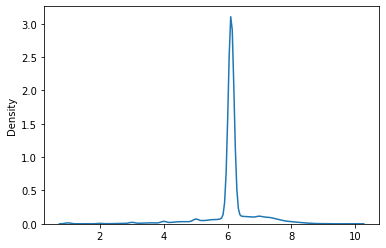

In [95]:
import seaborn as sns
sns.kdeplot(x[0])

<AxesSubplot:ylabel='Density'>

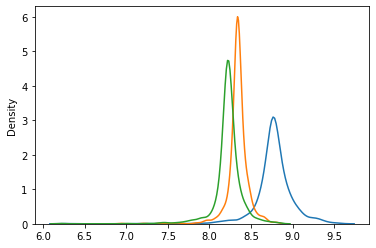

In [78]:
sns.kdeplot(x[:, 1])
sns.kdeplot(x[:, 5])
sns.kdeplot(x[:, 6])

In [80]:
x.mean(1)

array([6.11202853, 6.11327388, 6.11162868, 6.11657827, 6.11203266,
       6.11867831, 6.11146773, 6.10395309, 6.11170663, 6.10995025,
       6.11255791, 6.11133427, 6.11228789, 6.11207217, 6.10921374,
       6.1125497 , 6.1120605 , 6.07544997, 6.11172297, 6.11277069,
       6.11217408, 6.11187388, 6.11231672, 6.11139139, 6.11109586,
       6.11543304, 6.11737256, 6.11230158, 6.10257223, 6.11282947,
       6.11257715, 6.11209505, 6.11201312, 6.11280842, 6.11124189,
       6.11321625, 6.11219752, 6.11122737, 6.10618174, 6.09211781,
       6.09260722, 6.11125179, 6.11195162, 6.11190683, 6.11938555,
       6.11236168, 6.11322586, 6.11133923, 6.11069612, 6.11223254,
       6.10434579, 6.11244512, 6.11327415, 6.11189215, 6.11261021,
       6.1117034 , 6.10235619, 6.11844248, 6.1092515 , 6.11191416,
       6.11158626, 6.11459458, 6.11105349, 6.11100754, 6.11127868,
       6.11236634, 6.10941502, 6.11580097, 6.11296401, 6.11240829,
       6.11294643, 6.11123352, 6.11315885, 6.11248323, 6.11135

In [ ]:
x.std(0).max()

In [70]:
dataset.csr_train.shape, std_array.shape

((3257, 48457), (48457,))

In [72]:
dataset.csr_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
for i, x in np.ndenumerate(reconstructed_standardized_samples):
    print(i, x)
    break

(0, 0) 3.4338317553996548e-15


In [ ]:
reconstructed_samples = reconstructed_standardized_samples*features_std + features_mean
unstandardized_samples = standardized_samples*features_std + features_mean

In [52]:
class SparseMatrixImputer:
    
    def __init__(self, nb_training_sample, ):
        self.nb_training_sample = nb_training_sample
    
    def fit(self, sparse_matrix):
        

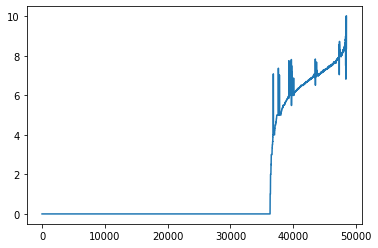

In [72]:
i = np.argsort(unstandardized_samples[0])
# plt.plot(unstandardized_samples[0][i])
plt.plot(reconstructed_sampels[0][i])

In [64]:
reconstructed_sampels[0]

array([0.        , 8.70135832, 0.        , ..., 0.        , 0.        ,
       5.60012691])

In [ ]:
good = (x[0] != 0)
x[0][good], pred_nmf_mat[0][good]

In [ ]:
pred_nmf_mat[0].mean(), pred_nmf_mat[0][good].mean()

In [110]:
pred_nmf_mat[0].mean(), pred_nmf_mat[0][good].mean()

(0.00834831730003733, 0.45700665852754774)

In [143]:
mat_best_i = (-nmf_mat).argsort(0)

In [144]:
mat_best_i.transpose(1, 0)[0]

array([4326, 5401, 5735, ..., 2906, 2843, 6434])

In [158]:
for i, indexes in enumerate(mat_best_i.transpose(1, 0)):
    print(x[indexes[0]][i], x[indexes[:10]][:, i].mean(), x[:, i].max(), (x[:, i] != 0).mean())

0 0.0 0 0.0
8 3.9 10 0.21662781662781663
0 0.0 0 0.0
0 0.0 0 0.0
0 0.0 0 0.0
10 4.7 10 0.09572649572649573
0 4.7 10 0.1324009324009324
5 0.5 10 0.02735042735042735
0 0.0 10 0.004817404817404817
0 0.0 0 0.0


In [175]:
x.shape, nmf_mat.shape, nmf_mat[:, :1].shape

((6435, 48457), (6435, 10), (6435, 1))

In [180]:
mask = (x!=0).repeat(10, -1)

In [186]:
y = np.dot(x.transpose(1, 0), nmf_mat[:, 0]/nmf_mat[:, 0].sum())
y.shape

(48457,)

In [190]:
y.max()/nmf_mat[:, 0].sum()

7.069970584740905

In [207]:
y = np.dot(x.transpose(1, 0), nmf_mat / nmf_mat.sum(0, keepdims=True))
y.shape

(48457, 10)

In [226]:
x.mean(0)[i].shape

(48457,)

In [224]:
import matplotlib.pyplot as plt
i = np.argsort(x.mean(0))


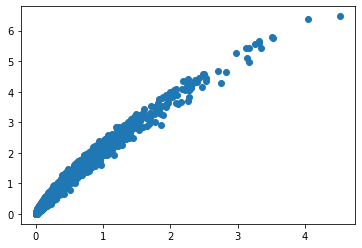

In [225]:
plt.scatter(x.mean(0)[i], y.mean(1)[i])


In [233]:
# CONCLUSION:

# Need to code it ...
# Maybe just do in pytorch
# OR go from scratch and work on a more simple example

In [231]:
from sklearn import decomposition

In [232]:
dir(decomposition)

['DictionaryLearning',
 'FactorAnalysis',
 'FastICA',
 'IncrementalPCA',
 'KernelPCA',
 'LatentDirichletAllocation',
 'MiniBatchDictionaryLearning',
 'MiniBatchSparsePCA',
 'NMF',
 'PCA',
 'SparseCoder',
 'SparsePCA',
 'TruncatedSVD',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_cdnmf_fast',
 '_dict_learning',
 '_factor_analysis',
 '_fastica',
 '_incremental_pca',
 '_kernel_pca',
 '_lda',
 '_nmf',
 '_online_lda_fast',
 '_pca',
 '_sparse_pca',
 '_truncated_svd',
 'dict_learning',
 'dict_learning_online',
 'fastica',
 'non_negative_factorization',
 'randomized_svd',
 'sparse_encode']

In [ ]:
model.fit(
    data.full_input_mode().dataset.batch(BATCH_SIZE),
    steps_per_epoch=25,
    epochs=20
#    callbacks=[callback]
)

In [8]:
model = build_regression_model(data.dim, hidden_dim=50)
model.summary()

Model: "encoding_decoding_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 310059)            0         
_________________________________________________________________
encoding_layer (Dense)       (None, 50)                15503000  
_________________________________________________________________
decoding_layer (Dense)       (None, 310059)            15813009  
Total params: 31,316,009
Trainable params: 31,316,009
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(
    data.masked_input_mode().dataset.batch(BATCH_SIZE),
    steps_per_epoch=25,
    epochs=20,
     callbacks=[callback]
)

Epoch 1/20

Epoch 00001: LearningRateScheduler reducing learning rate to 0.003.
12/25 [=============>................] - ETA: 6s - loss: 5604.4783

KeyboardInterrupt: 

In [41]:
x[0][0]

<tf.Tensor: shape=(11,), dtype=int32, numpy=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)>

In [65]:
model.fit(
    data.full_input_mode().dataset.batch(BATCH_SIZE),
    steps_per_epoch=25,
    epochs=20
#     callbacks=[callback]
)

Epoch 1/20
25/25 [==============================] - 12s 455ms/step - loss: 0.0606
Epoch 2/20
25/25 [==============================] - 11s 453ms/step - loss: 0.0440
Epoch 3/20
25/25 [==============================] - 11s 461ms/step - loss: 0.0305
Epoch 4/20
25/25 [==============================] - 13s 509ms/step - loss: 0.0201
Epoch 5/20
25/25 [==============================] - 13s 526ms/step - loss: 0.0128
Epoch 6/20
25/25 [==============================] - 13s 534ms/step - loss: 0.0082
Epoch 7/20
25/25 [==============================] - 12s 484ms/step - loss: 0.0053
Epoch 8/20
25/25 [==============================] - 13s 529ms/step - loss: 0.0037
Epoch 9/20
25/25 [==============================] - 13s 513ms/step - loss: 0.0027
Epoch 10/20
25/25 [==============================] - 12s 474ms/step - loss: 0.0022
Epoch 11/20
25/25 [==============================] - 12s 477ms/step - loss: 0.0019
Epoch 12/20
25/25 [==============================] - 12s 479ms/step - loss: 0.0019
Epoch 13/20
2

In [20]:
from evaluate import get_raw_predictions, get_flat_prediction

<AxesSubplot:>

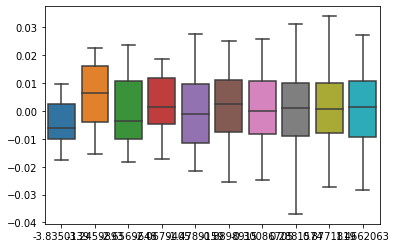

In [21]:
import seaborn as sns
in_values, true_values, pred_values = get_flat_prediction(data.dataset, model, 100)
sns.boxplot(x=true_values, y=pred_values)

<AxesSubplot:>

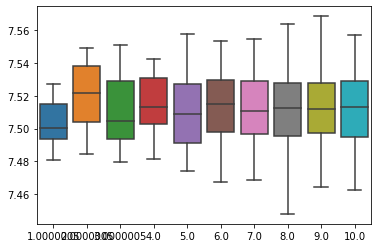

In [22]:
true_values = true_values * data.data_std + data.data_mean
pred_values = pred_values * data.data_std + data.data_mean
sns.boxplot(x=true_values, y=pred_values)

<AxesSubplot:>

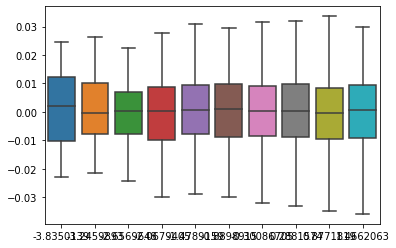

In [23]:
import seaborn as sns
in_values, true_values, pred_values = get_flat_prediction(data.dataset, model, 500)
sns.boxplot(x=true_values, y=pred_values)

<AxesSubplot:>

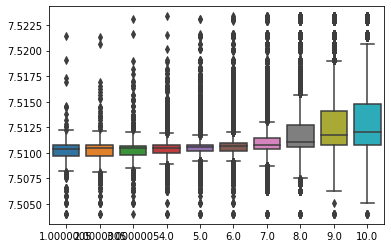

In [67]:
true_values = true_values * data.data_std + data.data_mean
pred_values = pred_values * data.data_std + data.data_mean
sns.boxplot(x=true_values, y=pred_values)

In [303]:
in_values, true_values, pred_values = get_results(500)
pred_df = pd.DataFrame({'true': true_values, 'pred': pred_values})
pred_df.corr()

,true,pred
true,1.000000,0.302101
pred,0.302101,1.000000


In [304]:
pred_df.true = pred_df.true.astype(int)
pred_df.pred = pred_df.pred.apply(lambda x: round(x))
pred_df.corr()

,true,pred
true,1.000000,0.297992
pred,0.297992,1.000000


<AxesSubplot:ylabel='Frequency'>

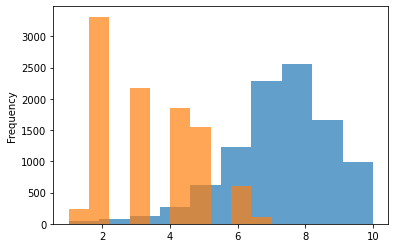

In [305]:
pred_df.true.plot.hist(alpha=0.7)
pred_df.pred.plot.hist(alpha=0.7)

In [75]:
cross = pd.crosstab(pred_df.true, pred_df.pred)

<AxesSubplot:xlabel='pred', ylabel='true'>

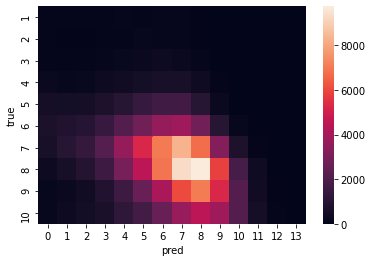

In [306]:
sns.heatmap(cross)

In [307]:
norm_cross = cross.div(cross.sum(axis=1), axis=0)

<AxesSubplot:xlabel='pred', ylabel='true'>

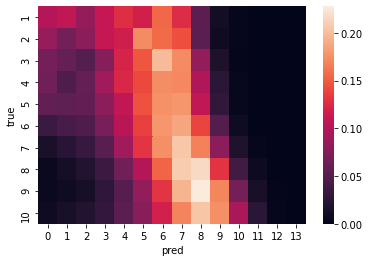

In [308]:
sns.heatmap(norm_cross)

In [ ]:
import numpy as np